# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [35]:
import numpy as np

In [36]:
int(np.random.choice(range(1,7),1))


5

In [37]:
#conclusion
# on va convertir l'array en entier avec la fonction 'int()'


### Simulation du lancé de dé

In [38]:
def Roll():
    return int(np.random.choice(7))

In [39]:
for i in range(10) :
   print(Roll())

4
4
4
0
4
1
2
2
5
3


### Compléter le code et commenter

In [40]:
A=0 #la position
NA=0 # la valeur du dé (apres lancement)
N=10 #position de la cible
c=0 #le compteur
while (A<N) :
    NA=Roll()
    if NA==6 and A==0:
        A=1
        c+=1
        print(NA,A,c)
    elif A>0 and NA+A<N:
        A+=NA
        c+=1
        print(NA,A,c)
    elif NA+A==N:
        c+=1
        A+=NA
        print(NA,A,c)
        break
    else : 
        c+=1
        print(NA,A,c)


6 1 1
5 6 2
3 9 3
5 9 4
2 9 5
1 10 6


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [41]:
def sim(N) : 
    A=0
    NA=20
    c=0
    while (A<N) :
        NA=Roll()
        if NA==6 and A==0:
            A=1
            c=c+1
        elif A>0 and NA+A<N:  #c'est la simulation du jeu lido avec grille longueur= N 
                              ##le principe du jeu : pouvoir determiner le plus petit nombre de coups possible pour atteindre la destination plus vite
            A=A+NA
            c=c+1
        elif NA+A==N:
            c=c+1
            A=A+NA
            break
        else :
            c=c+1
    return c
    

In [42]:
sim(20)

10

### Simulation de $10^5$  scénario 

In [43]:
for i in range(10):
    print(sim(20))

20
12
39
12
12
15
20
24
7
14


In [44]:
E=10000
N=15
L=[]
for i in range(E):
    L.append(sim(N))
def moyenne(L):
    tot=0
    for u in L:
        tot=tot+u
    return tot/len(L)
moyenne(L)

17.242

## Conclusion : on joue le lido E nombre de fois pour atteindre une cible N =15 en moyenne on a besoin de 17 coup pour finir le jeu.

In [45]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [46]:
ESP=Freq.sum()/10**5

In [47]:
x=list(range(10,20))

In [48]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [49]:
import matplotlib.pyplot as plt
xx=np.linspace(10,20,50)
yy=0.33709890909090906*xx+12.150573818181819

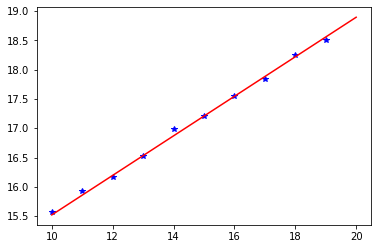

In [54]:
plt.plot(x,y,'b*')
plt.plot(xx,yy,'r')


In [51]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [52]:
slope
#a

0.3293386666666666

In [55]:
intercept
#b


12.280349333333334

## Conclusion :
$$\mathbb{E}(X_n)=0.329\times n + 12.280$$
la fonction d'une droite lineaire affine
